In [591]:
#statistical
import pandas as pd
import numpy as np

#dataset
from sklearn.datasets import *

#mchine learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, classification_report
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

#graphing and display
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output
%matplotlib inline
from pprint import pprint

In [592]:
def create_dataset(bunch):
    df = pd.DataFrame(bunch.data, columns = bunch.feature_names)
    if len(bunch.target.shape) > 1:
        for i, target in enumerate(bunch.target_names):
            df[target] = bunch.target[:, i]
    else:
        df['target'] = bunch.target
    return df

In [593]:
iris = load_iris()
boston_housing = load_boston()
diabetes = load_diabetes()
linnerud = load_linnerud()
wine = load_wine()
breast_cancer = load_breast_cancer()

In [594]:
datasets = {}
for name, bunch in zip(['diabetes', 'wine', 'linnerud', 'breast_cancer', 'boston_housing', 'iris'],
                       [diabetes, wine, linnerud, breast_cancer, boston_housing, iris]):
    datasets[name] = create_dataset(bunch)

In [595]:
datasets['breast_cancer'].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [596]:
for key, dataframe in datasets.items():
    print(key, dataframe.shape)

diabetes (442, 11)
wine (178, 14)
linnerud (20, 6)
breast_cancer (569, 31)
boston_housing (506, 14)
iris (150, 5)


# Draw Learning Curves

In [597]:
train_sizes, train_scores, test_scores = learning_curve(GaussianNB(),
                                                        datasets['breast_cancer'].drop('target', axis = 1),
                                                        datasets['breast_cancer'].target,
                                                        train_sizes = np.arange(0.1, 1, 0.1))

In [598]:
learning_curve_res = pd.DataFrame(columns = range(train_scores.shape[1]))
for result, result_type in zip([train_scores, test_scores], ['train', 'test']):
    frame = pd.DataFrame(result)
    frame['size'] = train_sizes
    frame['type'] = result_type
    learning_curve_res = learning_curve_res.append(frame, ignore_index = True)

C:\Users\rossr\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:465: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)


In [599]:
learning_curve_res.head()

,0,1,2,size,type
0,1.000000,1.000000,1.000000,37.0,train
1,0.973333,0.973333,0.973333,75.0,train
2,0.964602,0.938053,0.938053,113.0,train
3,0.966887,0.913907,0.927152,151.0,train
4,0.957672,0.931217,0.931217,189.0,train


In [600]:
learning_curve_res = learning_curve_res.melt(id_vars = ['size', 'type'], var_name = 'cv_fit', value_name = 'score')

In [601]:
learning_curve_res.head()

,size,type,cv_fit,score
0,37.0,train,0,1.000000
1,75.0,train,0,0.973333
2,113.0,train,0,0.964602
3,151.0,train,0,0.966887
4,189.0,train,0,0.957672


C:\Users\rossr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


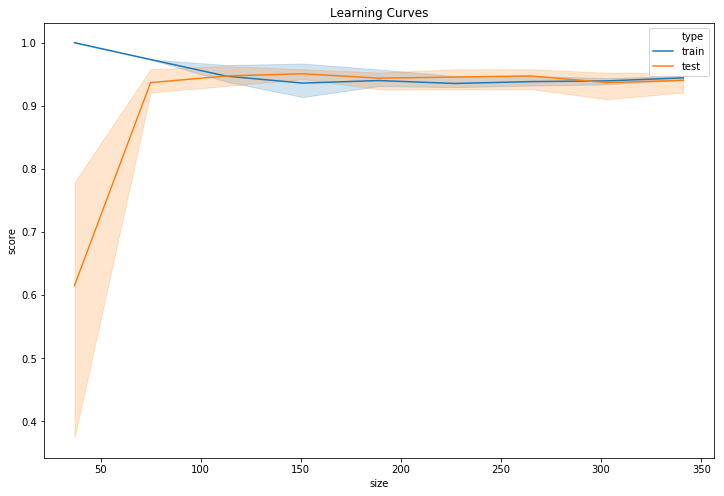

In [602]:
fig = plt.figure(figsize = (12, 8))
plt.title('Learning Curves')
sns.lineplot(x = 'size', y = 'score', hue = 'type', data = learning_curve_res)

# Pipeline Several Objects

In [603]:
pipeline = Pipeline(steps = [('scaling', StandardScaler()), ('log_reg', LogisticRegression())])

In [604]:
X_train, X_test, y_train, y_test = train_test_split(datasets['breast_cancer'].drop('target', axis = 1),
                                                    datasets['breast_cancer'].target,
                                                    random_state = 42,
                                                    test_size = 0.3)

In [605]:
model = LogisticRegression()
'{:.2%}'.format(model.fit(X_train, y_train).score(X_test, y_test))

'96.49%'

In [606]:
'{:.2%}'.format(pipeline.fit(X_train, y_train).score(X_test, y_test))

'98.25%'

# Prepare Scoring Report

In [607]:
print(classification_report(y_test, pipeline.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98        63
          1       0.99      0.98      0.99       108

avg / total       0.98      0.98      0.98       171



# Optimize a Model Using Grid Search

In [608]:
parameter_grid = {'penalty' : ['l1', 'l2'], 'C' : np.arange(0.01, 1., 0.01)}
grid = GridSearchCV(estimator = LogisticRegression(), param_grid = parameter_grid, scoring = 'f1', verbose = 1)

In [609]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 198 candidates, totalling 594 fits


[Parallel(n_jobs=1)]: Done 594 out of 594 | elapsed:   26.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([0.01, 0.02, ..., 0.98, 0.99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [610]:
'{:.2%}'.format(grid.score(X_test, y_test))

'97.25%'

In [611]:
grid.best_params_

{'C': 0.73, 'penalty': 'l1'}

In [612]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

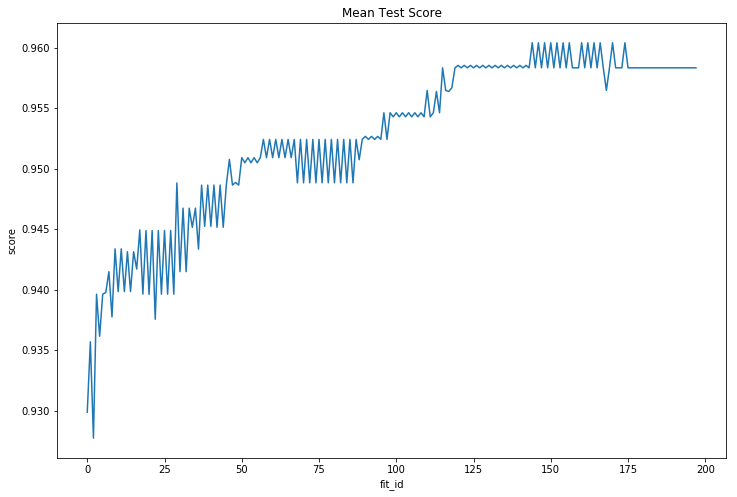

In [613]:
fig = plt.figure(figsize = (12, 8))
plt.title('Mean Test Score')
plt.xlabel('fit_id')
plt.ylabel('score')
plt.plot(grid.cv_results_['mean_test_score'])

# Get a Cross Validation Score

In [614]:
cross_val_score(grid.best_estimator_,
                datasets['breast_cancer'].drop('target', axis = 1),
                datasets['breast_cancer'].target,
                scoring = 'f1')

array([0.95473251, 0.97925311, 0.9527897 ])

# Create a Multi-Estimator Pipeline

In [712]:
#takes list of estimators and list of scorers
#fits all models, records scores, records fitted models
#uses external train-test split, external make_score
#plots learning curves
#selects best model
#displays statistics per model
#tunes up the parameters of a model
#can use k-fold cross validation

In [713]:
class MultiEstimator:
    def __init__(self, estimators, scorer, train_sizes = None, cv = None):
        self.estimators = estimators
        self.scorer = scorer
        self.train_sizes = np.linspace(0.1, 1.0, 5) if not train_sizes else train_sizes
        self.cv = cv
        self.scores = {}
        self.best_estimator = None
        self.scores_frame = None
    
    def fit(self, X, y):
        for estimator_name in self.estimators.keys():
            train_sizes, train_scores, test_scores = learning_curve(self.estimators[estimator_name],
                                                                    X, y,
                                                                    scoring = self.scorer,
                                                                    cv = self.cv,
                                                                    train_sizes = self.train_sizes)
            self.scores[estimator_name] = dict([('train', dict(zip(train_sizes, train_scores))),
                                                ('test', dict(zip(train_sizes, test_scores)))])
            
            self.estimators[estimator_name].fit(X, y)
        
        self.train_sizes_res = train_sizes
        self.get_score_dataframe()
        self.get_best_model()
        
        return self
    
    def score(self, X, y_true):
        self.best_estimator.score(X, y_true)
        
        return self
    
    def predict(self, X):
        pass
    
    def predict_log_proba(self, X):
        pass
    
    def predict_proba(self, X):
        pass
    
    def draw_learning_curves():
        pass
    
    def get_scoring_report(self):
        report = pd.pivot_table(data = self.scores_frame,
                                index = 'size',
                                columns = ['estimator', 'type'],
                                values = 'score',
                                aggfunc = 'mean')
        
        return report
    
    def perform_grid_search(self, parameter_grid, X, y):
        if self.best_estimator is None:
            raise Exception('An estimator must be selected first!')
        else:
            self.grid_search_cv = GridSearchCV(estimator = self.best_estimator,
                                               param_grid = parameter_grid,
                                               scoring = self.scorer,
                                               verbose = 0)
            self.grid_search_cv.fit(X, y)
            self.best_estimator = self.grid_search_cv.best_estimator_
        
        return self
    
    def get_best_model(self):
        estimator_scores = self.scores_frame[self.scores_frame['size'] ==\
                                             self.scores_frame['size'].max()]\
        [['estimator', 'score']].groupby(by = 'estimator').mean()
        
        estimator_name = estimator_scores[estimator_scores['score'] ==\
                                          estimator_scores['score'].max()].index[0]
        
        self.best_estimator = self.estimators[estimator_name]
        
        return self
    
    def set_best_model(self, estimator_name):
        self.best_estimator = self.estimators[estimator_name]
        
        return self
    
    def get_score_dataframe(self):
        self.scores_frame = pd.DataFrame(columns = ['estimator', 'type', 'size', 'cv_fit', 'score'])
        for estimator in self.scores.keys():
            for score_type in self.scores[estimator].keys():
                for size in self.scores[estimator][score_type].keys():
                    for cv_fit, score in enumerate(self.scores[estimator][score_type][size].tolist()):
                        to_append = pd.DataFrame([[estimator, score_type, size, cv_fit, score]],
                                                 columns = scores.columns)
                        self.scores_frame = self.scores_frame.append(to_append, ignore_index = True)
        
        return self

In [714]:
models = {'naive_bayes' : GaussianNB(), 'log_reg' : LogisticRegression(), 'tree' : DecisionTreeClassifier()}

In [715]:
model_explorer = MultiEstimator(models, 'f1')

In [716]:
model_explorer.fit(X_train, y_train).get_score_dataframe()

In [717]:
model_explorer.scores_frame.head()

,estimator,type,size,cv_fit,score
0,naive_bayes,train,26,0,1.000000
1,naive_bayes,train,26,1,0.972973
2,naive_bayes,train,26,2,0.972973
3,naive_bayes,train,86,0,0.991870
4,naive_bayes,train,86,1,0.957983


In [718]:
'{:.2%}'.format(model_explorer.estimators['naive_bayes'].score(X_test, y_test))

'94.15%'

In [719]:
model_explorer.get_scoring_report()

estimator   log_reg           naive_bayes                tree      
type           test     train        test     train      test train
size                                                               
26         0.911912  1.000000    0.924665  0.981982  0.912842   1.0
86         0.937012  0.977401    0.939103  0.969279  0.921904   1.0
145        0.945436  0.964008    0.952568  0.962334  0.942088   1.0
205        0.950780  0.965245    0.946706  0.964208  0.924928   1.0
265        0.958296  0.964137    0.946262  0.952755  0.927047   1.0

In [720]:
'{:.2%}'.format(model_explorer.best_estimator.score(X_test, y_test))

'94.15%'

In [721]:
model_explorer.best_estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [722]:
parameter_grid = {'max_depth' : np.arange(5, 21, 1)}
model_explorer.perform_grid_search(parameter_grid, X_train, y_train)

In [723]:
model_explorer.best_estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [724]:
'{:.2%}'.format(model_explorer.best_estimator.score(X_test, y_test))

'91.81%'